# Part A: Adaline Implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
class Adaline:
    def __init__(self, in_features=2, lr=0.01, stop_tolerance=1e-1): # DON'T CHANGE THIS METHOD
        """
        Initialize the Adaline model.

        Parameters:
        - in_features (int): Number of input features (default is 2).
        - lr (float): Learning rate for weight updates (default is 0.01).
        - stop_tolerance (float): Tolerance for stopping criterion (default is 1e-1).
        """
        np.random.seed(42)
        self.lr = lr
        self.stop_tolerance = stop_tolerance
        self.in_features = in_features
        self.b = np.random.random()
        self.weight = np.random.random(in_features)

    def forward(self, X):
        """
        Compute the net input for the given input features.

        Parameters:
        - X (numpy.ndarray): Input features.

        Returns:
        - net (numpy.ndarray): The computed net input.
        """
        # TODO: Implement the forward pass to compute the net input
        # Hint: Use the dot product of X and weights and add the bias.
        net = np.dot(X, self.weight) + self.b
        return net

    def step(self, X, net, y):
        """
        Update weights and bias based on the error.

        Parameters:
        - X (numpy.ndarray): Input feature vector.
        - net (float): Computed net input.
        - y (float): Actual target value.

        Returns:
        - float: The largest weight change to monitor convergence.
        """
        # TODO: Update weights and bias based on the error
        # Hint: Use the Adaline learning rule. Calculate delta_w and delta_b.
        delta_w = self.lr * (y - net) * X
        delta_b = self.lr * (y - net)

        self.weight = self.weight + delta_w
        self.b = self.b + delta_b

        delta = np.concatenate([delta_w, np.array([delta_b])])
        return delta.max()

    def train(self, X, Y, max_epochs=10):
        """
        Train the Adaline model using the provided data.

        Parameters:
        - X (numpy.ndarray): Input features for training.
        - Y (numpy.ndarray): Target labels for training.
        - max_epochs (int): Maximum number of training epochs (default is 10).
        """
        # TODO: Train the model until the stopping condition or max_epochs
        # Hint: Loop through epochs and update weights for each sample.
        for i in range(max_epochs):
            finish = False
            for j in range(X.size):
                net_input = self.forward(X[j])
                largest_change = self.step(X[j], net_input, Y[j])
                if largest_change < self.stop_tolerance:
                    finish = True
                    break
            if finish:
                break

    def activation_function(self, X):
        """
        Apply the activation function (step function) to the net input.

        Parameters:
        - X (numpy.ndarray): Net input values.

        Returns:
        - numpy.ndarray: Activated output values.
        """
        # TODO: Implement the activation function (step function)
        return np.where(X >= 0, 1, -1)

    def predict(self, X):
        """
        Predict class labels for new input data.

        Parameters:
        - X (numpy.ndarray): Input features for prediction.

        Returns:
        - numpy.ndarray: Predicted class labels.
        """
        # TODO: Predict class labels for new inputs
        predicted_labels = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            predicted_labels[i][0] = self.forward(X[i])
        return self.activation_function(predicted_labels)

    def accuracy(self, X, y):
        """
        Calculate the accuracy of the predictions.

        Parameters:
        - X (numpy.ndarray): Input features for prediction.
        - y (numpy.ndarray): Actual target labels.

        Returns:
        - float: The accuracy of the model.
        """
        # TODO: Compute the accuracy of the predictions
        predicted = self.predict(X)
        return (np.count_nonzero(predicted == True)) / predicted.size

    def plot_scatter(self, X, Y): # DON'T CHANGE THIS METHOD
        """
        Plot the scatter of input features and the decision boundary.

        Parameters:
        - X (numpy.ndarray): Input features.
        - Y (numpy.ndarray): Target labels.
        """
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=Y,
            cmap='tab20b',
            edgecolors="k",
            alpha=0.95,
        )
        h = 0.01
        xx, yy = np.meshgrid(np.arange(min(X[:, 0]) - 2, max(X[:, 0]), h) + 1,
                             np.arange(min(X[:, 1]) - 1, max(X[:, 1]), h) + 1)
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cm = plt.cm.tab20b
        plt.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
        plt.title("Adaline Decision Boundary")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

In [6]:
# DON'T CHANGE THIS CELL

# Main code to load data, train, and visualize
def main():
    # Load the dataset
    df = pd.read_csv('Madaline.csv', names=['x', 'y', 'label'], header=None)
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Prepare inputs and targets
    data = df[['x', 'y']].to_numpy()
    target = df[['label']].to_numpy()

    # Convert labels to bipolar
    target[np.isclose(target, 0)] = -1

    # Create and train the Adaline model
    adaline = Adaline(in_features=2, lr=0.01, stop_tolerance=1e-1)

    # Flatten target for training
    adaline.train(data, target.flatten(), max_epochs=100)

    # Predict and calculate accuracy
    predictions = adaline.predict(data)
    accuracy = adaline.accuracy(data, target.flatten())
    print(f'Accuracy: {accuracy:.4f}')

    # Plot the results
    adaline.plot_scatter(data, target.flatten())

    # Create confusion matrix and classification report
    cm = confusion_matrix(target, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.pdf")
    plt.show()

    print(classification_report(target, predictions))

Accuracy: 0.6300


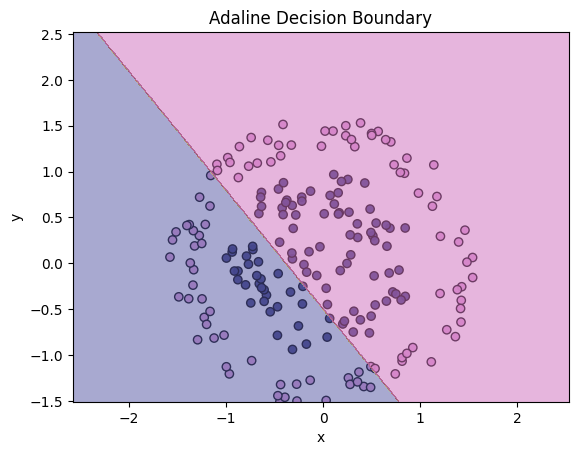

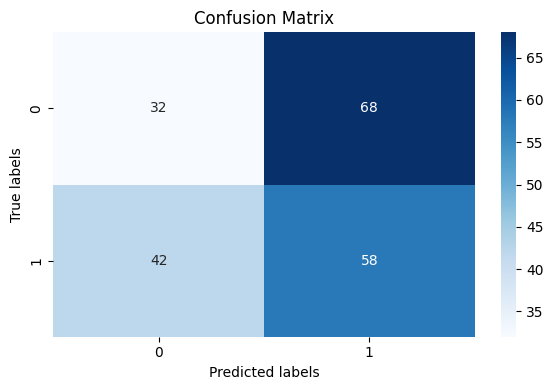

              precision    recall  f1-score   support

        -1.0       0.43      0.32      0.37       100
         1.0       0.46      0.58      0.51       100

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.44       200



In [7]:
# DON'T CHANGE THIS CELL
# Execute main function
if __name__ == "__main__":
    main()

# Part B: Madaline Implementation

In [90]:
# The Madaline Network is considered to have 2 hidden layers for this class implementation
class MadalineClassifier:
    def __init__(self, csv_file, num_neurons_layer1=3, num_neurons_layer2=2, learning_rate=0.0001, max_iter=200):
        """
        Initialize the Madaline classifier.

        Parameters:
        - csv_file (str): Path to the CSV file containing the dataset.
        - num_neurons_layer1 (int): Number of neurons in the first layer (default is 3).
        - num_neurons_layer2 (int): Number of neurons in the second layer (default is 2).
        - learning_rate (float): Learning rate for weight updates (default is 0.0001).
        - max_iter (int): Maximum number of iterations for training (default is 200).
        """
        # DON'T CHANGE THIS METHOD
        self.df = pd.read_csv(csv_file, names=['x', 'y', 'label'], header=None)
        self.df = self.df.sample(frac=1)
        self.inputs = self.df[['x', 'y']].to_numpy()
        self.target = self.df[['label']].to_numpy()
        self.target[np.isclose(self.target, 0)] = -1
        self.num_neurons_layer1 = num_neurons_layer1
        self.num_neurons_layer2 = num_neurons_layer2
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.biases = None
        self.weights_layer2 = None
        self.biases_layer2 = None

    def plot_data(self): # DON'T CHANGE THIS METHOD
        """
        Plot the input data points in a scatter plot.

        The method visualizes the dataset by plotting the two classes with different colors.
        """
        df0 = self.df.loc[self.df['label'] == 0]
        df1 = self.df.loc[self.df['label'] == 1]

        plt.scatter(df0['x'], df0['y'], c="red", linewidths=2)
        plt.scatter(df1['x'], df1['y'], c="blue", linewidths=2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1", "Class 2"])
        plt.grid(True)
        plt.title("Scatter Plot")
        plt.tight_layout()
        plt.savefig("scatter_plot.pdf")
        plt.show()

    def initialize_weights(self, sm):
        """
        Initialize weights and biases for the Madaline model.

        Parameters:
        - sm (int): Size of the input data.

        This method initializes weights for the first and second layers, as well as biases.
        """
        # ToDo: Implement the weight initialization method.
        # Hints:
        # 1. Initialize weights for the first layer.
        # 2. Initialize biases for the first layer.
        # 3. Initialize weights and biases for the second layer.
        self.weights = np.random.random((sm, self.num_neurons_layer1))
        self.biases = np.random.random((1, self.num_neurons_layer1))
        self.weights_layer2 = np.random.random((self.num_neurons_layer1, self.num_neurons_layer2))
        self.biases_layer2 = np.random.random((1, self.num_neurons_layer2))

    def find_decision_boundary(self, start_x, end_x, weights, biases):
        """
        Calculate the decision boundary based on weights and biases.

        Parameters:
        - start_x (float): Starting x-value for the decision boundary.
        - end_x (float): Ending x-value for the decision boundary.
        - weights (numpy.ndarray): Weights for the layer.
        - biases (numpy.ndarray): Biases for the layer.

        Returns:
        - (numpy.ndarray, numpy.ndarray): x-coordinates and corresponding y-coordinates of the decision boundary.
        """
        # ToDo: Implement the decision boundary calculation.
        # Hints: You might calculate the output of the decision boundary
        # using the weights and biases.
        x = np.linspace(-2, 2, 200)
        a = (-1 * weights[0]) / weights[1]
        b = (-1 * biases) / weights[1]
        y = np.add(a * x, b)
        return x, y
        

    def apply_activation_function(self, net):
        """
        Apply the activation function to the net input.

        Parameters:
        - net (numpy.ndarray): Net input values.

        Returns:
        - numpy.ndarray: Activated output values.
        """
        # ToDo: Implement the activation function. (Step Function)
        return 1 / (1 + np.exp(-net))

    def forward_propagation(self, weights, inputs, biases, should_reshape):
        """
        Perform forward propagation through the network.

        Parameters:
        - weights (numpy.ndarray): Weights for the layer.
        - inputs (numpy.ndarray): Input data.
        - biases (numpy.ndarray): Biases for the layer.
        - should_reshape (bool): Indicates if inputs should be reshaped.

        Returns:
        - (numpy.ndarray, numpy.ndarray): Net input and activated output.
        """
        # ToDo: Implement forward propagation.
        # Hints:
        # 1. If should_reshape is True, reshape it to the correct shape.
        # 2. Calculate net_input
        if should_reshape:
            input.reshape(1, -1)
        net = inputs @ weights + biases
        activated = self.apply_activation_function(net)
        return net, activated

    def update_weights_layer2(self, inputs, target, net_input, output, neuron):
        """
        Update the weights based on the target and output.

        Parameters:
        - inputs (numpy.ndarray): Input feature vector.
        - target (float): Actual target value.
        - net_input (float): Computed net input.
        - output (float): Activated output.
        - neuron (int): number of neuron that their weights are updated.

        Returns:
        - local_gradient (float): local_gradient of neuron.

        Updates the weights and biases for the neurons based on the error.
        """
        # ToDo: Implement the weight update logic.
        
        # calculate local gradient for output neuron(derror/dnet_input)
        derivation = output * (1 - output)
        local_gradient = (target - output) * derivation
        
        self.weights_layer2[:, neuron] += self.learning_rate * local_gradient * inputs
        self.biases_layer2[0][neuron] += self.learning_rate * local_gradient
        return local_gradient
    
    def update_weights_layer1(self, inputs, error_backprop, net_input, output, neuron):
        """
        Update the weights based on the target and output.

        Parameters:
        - inputs (numpy.ndarray): Input feature vector.
        - error_backprop (float): backpropagated error.
        - net_input (float): Computed net input.
        - output (float): Activated output.
        - neuron (int): number of neuron that their weights are updated.

        Updates the weights and biases for the neurons based on the error.
        """
        # ToDo: Implement the weight update logic.
        
        # calculate local gradient for output neuron(derror/dnet_input)
        derivation = output * (1 - output)
        local_gradient = error_backprop * derivation
        
        self.weights[:, neuron] += self.learning_rate * local_gradient * inputs
        self.biases[0][neuron] += self.learning_rate * local_gradient

    def calculate_error(self, target, output):
        """
        Calculate the error based on the target and predicted output.

        Parameters:
        - target (numpy.ndarray): Actual target values.
        - output (numpy.ndarray): Predicted output values.

        Returns:
        - float: Calculated mean squared error.
        """
        # ToDo: Implement the error calculation.
        mean_squared_error = 0
        for i in range(target.shape[0]):
            error = output[i] - target[i]
            squared_error = (np.sum(error**2)) / 2
            mean_squared_error += squared_error
        mean_squared_error = mean_squared_error / target.shape[0]
        return mean_squared_error

    def predict(self, inputs):
        """
        Predict class labels for the given input data.

        Parameters:
        - inputs (numpy.ndarray): Input data for prediction.

        Returns:
        - numpy.ndarray: Predicted class labels.
        """
        # ToDo: Implement the prediction function.
        outputs = np.zeros((inputs.shape[0], 1))
        for j in range(outputs.size):
            net_layer1, activated_layer1 = self.forward_propagation(self.weights, self.inputs[j], self.biases, False)
            net_layer2, activated_layer2 = self.forward_propagation(self.weights_layer2, activated_layer1, self.biases_layer2, False)
            if activated_layer2[0][0] > activated_layer2[0][1]:
                outputs[j][0] = 1
            else:
                outputs[j][0] = -1
        return outputs

    def train(self):
        """
        Train the Madaline model on the input data.

        This method implements the training loop for the Madaline model.
        """
        # ToDo: Implement the training loop.
        # Hints:
        # 1. Shuffle the dataset and reset the index.
        # 2. Initialize necessary variables.
        # 3. You might want to perform forward & backward prop.
        self.initialize_weights(self.inputs.shape[1])
        error_list = []
        for i in range(self.max_iter):
            targets_layer = np.zeros((self.inputs.shape[0], self.num_neurons_layer2))
            outputs_layer = np.zeros((self.inputs.shape[0], self.num_neurons_layer2))
            for j in range(self.inputs.shape[0]):
                net_layer1, activated_layer1 = self.forward_propagation(self.weights, self.inputs[j], self.biases, False)
                net_layer2, activated_layer2 = self.forward_propagation(self.weights_layer2, activated_layer1, self.biases_layer2, False)
                # update weights layer2
                target = (1 - self.target[j]) / 2
                local_gradient1 = self.update_weights_layer2(activated_layer1[0], target, net_layer2[0][1], activated_layer2[0][1], 1)
                local_gradient0 = self.update_weights_layer2(activated_layer1[0], 1 - target, net_layer2[0][0], activated_layer2[0][0], 0)
                local_gradient = np.array([local_gradient0, local_gradient1])
                # update weights layer1
                for neuron in range(self.num_neurons_layer1):
                    error_backprop = np.dot(self.weights_layer2[neuron], local_gradient)
                    self.update_weights_layer1(self.inputs[j], error_backprop, net_layer1[0][neuron], activated_layer1[0][neuron], neuron)
                outputs_layer[j] = activated_layer2
                targets_layer[j][0] = 1 - target
                targets_layer[j][1] = target
            error_list.append(self.calculate_error(targets_layer, outputs_layer))
        return self.weights, self.biases, error_list                

    def plot_error(self, error_list, df0, df1): # DON'T CHANGE THIS METHOD
        """
        Plot the training error and decision boundaries.

        Parameters:
        - error_list (list): List of mean squared error values for each epoch.
        - df0 (DataFrame): DataFrame containing class 0 data.
        - df1 (DataFrame): DataFrame containing class 1 data.
        """
        plt.plot(error_list)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Error Plot')
        plt.grid(True)
        plt.savefig('error_plot.pdf')
        plt.show()

        plt.scatter(df0['x'], df0['y'], c="red", linewidths=0.1)
        plt.scatter(df1['x'], df1['y'], c="blue", linewidths=0.1)

        for i in range(self.num_neurons_layer1):
            px1, px2 = self.find_decision_boundary(-2, 2, self.weights.T[i], self.biases[0][i])
            plt.plot(px1, px2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1", "Class 2"])
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.savefig('error_plot1.pdf')
        plt.show()

        predicted_output = self.predict(self.inputs)
        cm = confusion_matrix(self.target, predicted_output)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.savefig("confusion_matrix.pdf")
        plt.show()

        print(classification_report(self.target, predicted_output))

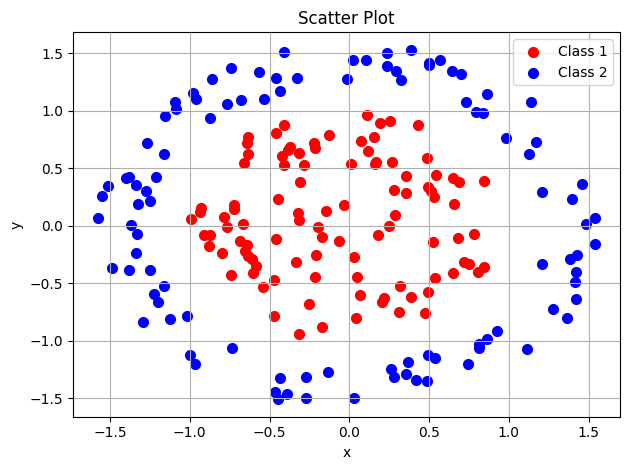

C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:151: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases_layer2[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:246: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

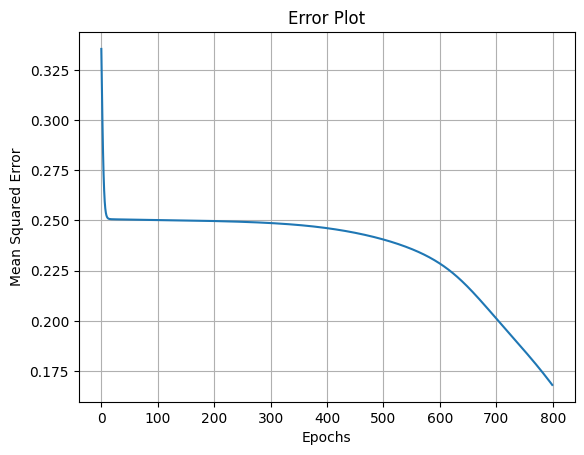

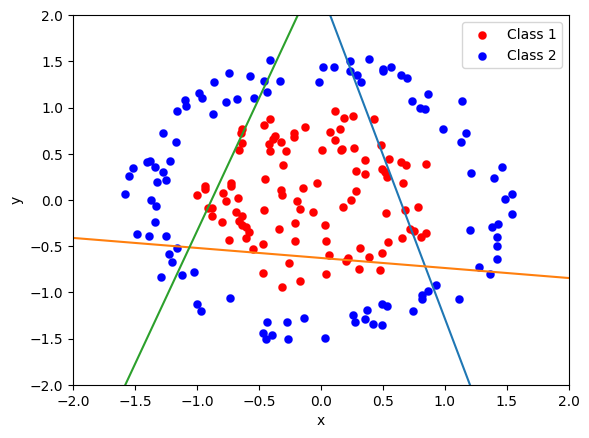

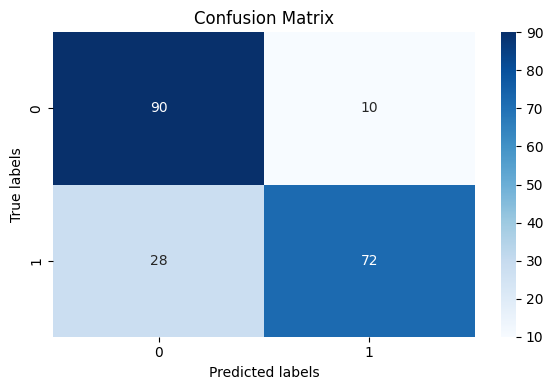

              precision    recall  f1-score   support

        -1.0       0.76      0.90      0.83       100
         1.0       0.88      0.72      0.79       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [96]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('Madaline.csv', num_neurons_layer1=3, num_neurons_layer2=2, max_iter=800, learning_rate=0.01)
classifier.plot_data()
weights, biases, error_list = classifier.train()
classifier.plot_error(error_list, df0 = classifier.df.loc[classifier.df['label'] == 0], df1 = classifier.df.loc[classifier.df['label'] == 1])

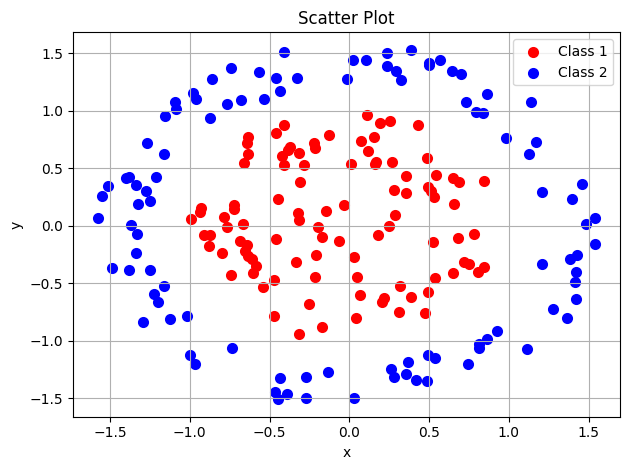

C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:151: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases_layer2[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:246: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

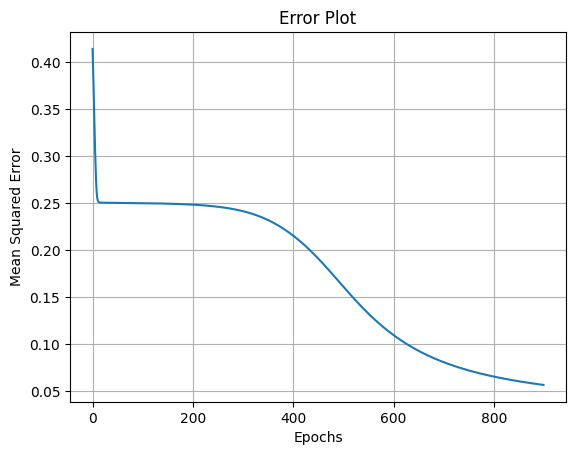

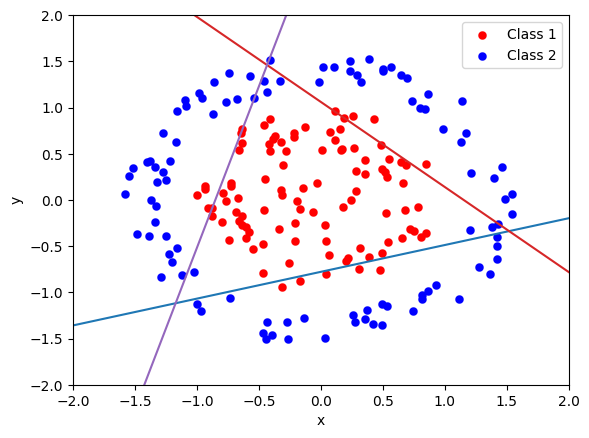

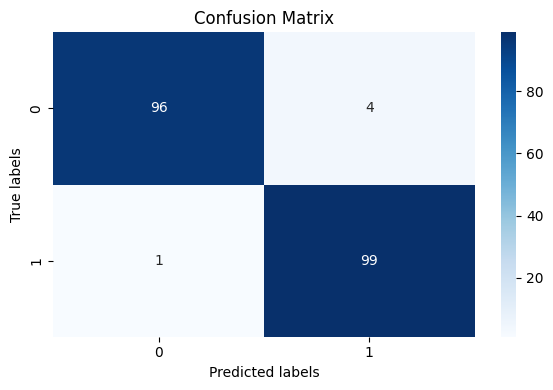

              precision    recall  f1-score   support

        -1.0       0.99      0.96      0.97       100
         1.0       0.96      0.99      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [104]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('Madaline.csv', num_neurons_layer1=5, num_neurons_layer2=2, max_iter=900, learning_rate=0.011)
classifier.plot_data()
weights, biases, error_list = classifier.train()
classifier.plot_error(error_list, df0 = classifier.df.loc[classifier.df['label'] == 0], df1 = classifier.df.loc[classifier.df['label'] == 1])

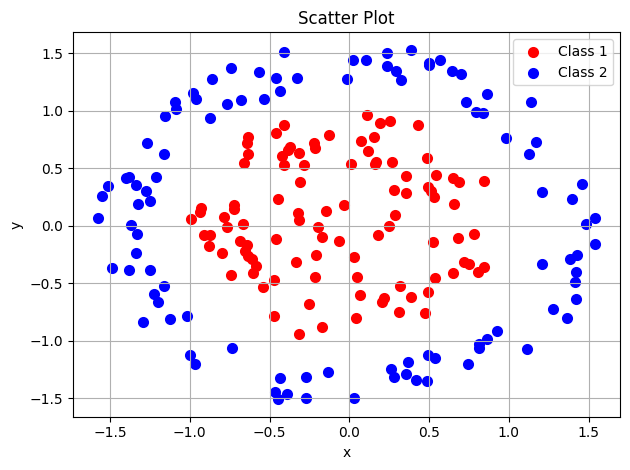

C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:151: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases_layer2[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[0][neuron] += self.learning_rate * local_gradient
C:\Users\Amir\AppData\Local\Temp\ipykernel_9832\2530578108.py:246: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

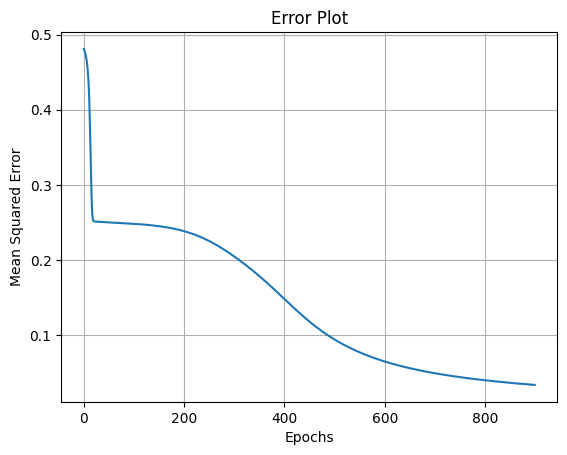

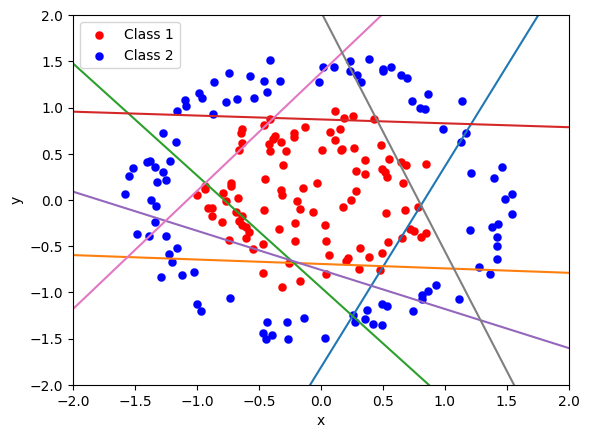

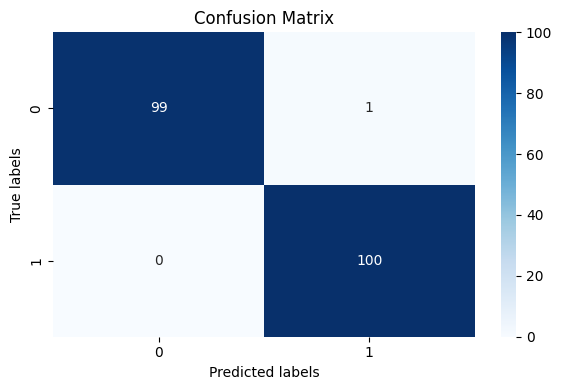

              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99       100
         1.0       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [105]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('Madaline.csv', num_neurons_layer1=10, num_neurons_layer2=2, max_iter=900, learning_rate=0.011)
classifier.plot_data()
weights, biases, error_list = classifier.train()
classifier.plot_error(error_list, df0 = classifier.df.loc[classifier.df['label'] == 0], df1 = classifier.df.loc[classifier.df['label'] == 1])

همانطور که مشاهده میکنید, نتایج به دست امده نشان میدهد که چندلایه بودن بهتر عمل کرده. در پوشه ایجاد شده نتایج خوب نتیجه حاصل از هر 3 مدل ترین شده قابل مشاهده است. همچنین خروجی های نشان داده شده در اینجا نیز همان نتایج است. اگر دقت کنید میبینید که با 3 نورون در لایه مخفی 1 به نتیجه تقریبا خوبی رسیده ایم و همچنین با تعداد 5 نورون و 10 نتیجه عالی شده. در حالی که اگر کلا با ادالاین این کار را انجام میدادیم نتایج خیلی جالب نبود چرا که داده ها تفکیک پذیر خطی نیستند 